In [156]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics


In [158]:
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')
df #df is the dataframe containing the entire csv
df['day']= df['date'].ne(df['date'].shift()).cumsum()
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())
df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg
0,0,4,B,1,805020202050,20201028,1,0,1,1,True,True,True,40.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,False,False,True,40.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,False,False,False,40.0
3,3,3,B,1,805020202050,20201028,1,3,1,1,False,False,True,40.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,False,False,False,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,False,False,False,45.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,False,False,False,45.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,False,False,False,45.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,False,False,False,45.0


In [159]:
df.loc[df.stem == "A", "ChooseA"] = 1
df.loc[df.stem == "B", "ChooseB"] = 1
df.loc[df.stem == "C", "ChooseC"] = 1
df['ChooseA'] = df['ChooseA'].fillna(0)
df['ChooseB'] = df['ChooseB'].fillna(0)
df['ChooseC'] = df['ChooseC'].fillna(0)

binframe = df[['ChooseA','ChooseB','ChooseC','reward']]


In [103]:
len(binframe)

13293

In [160]:
#need swapConting, newDays, and chgEpoch 
swapConting = (df[df['cont_num'].ne(df['cont_num'].shift())].index).tolist()
newDays = (df[df['day'].ne(df['day'].shift())].index).tolist()
chgEpoch = (df[df['session'].ne(df['session'].shift())].index).tolist()
Alist= binframe['ChooseA'].tolist()
Blist= binframe['ChooseB'].tolist()
Clist= binframe['ChooseC'].tolist()

Alist = [int(x) for x in Alist]
Blist = [int(x) for x in Blist]
Clist = [int(x) for x in Clist]

len(Alist)
swapConting

[0,
 60,
 120,
 180,
 240,
 300,
 360,
 420,
 480,
 540,
 600,
 660,
 720,
 780,
 840,
 900,
 960,
 993,
 1053,
 1113,
 1173,
 1233,
 1293,
 1353,
 1413,
 1473,
 1533,
 1593,
 1653,
 1713,
 1773,
 1833,
 1893,
 1953,
 2013,
 2073,
 2133,
 2193,
 2253,
 2313,
 2373,
 2433,
 2493,
 2553,
 2613,
 2673,
 2733,
 2793,
 2853,
 2913,
 2973,
 3033,
 3093,
 3153,
 3213,
 3273,
 3333,
 3393,
 3453,
 3513,
 3573,
 3633,
 3693,
 3753,
 3813,
 3873,
 3933,
 3993,
 4053,
 4113,
 4173,
 4233,
 4293,
 4353,
 4413,
 4473,
 4533,
 4593,
 4653,
 4713,
 4773,
 4833,
 4893,
 4953,
 5013,
 5073,
 5133,
 5193,
 5253,
 5313,
 5373,
 5433,
 5493,
 5553,
 5613,
 5673,
 5733,
 5793,
 5853,
 5913,
 5973,
 6033,
 6093,
 6153,
 6213,
 6273,
 6333,
 6393,
 6453,
 6513,
 6573,
 6633,
 6693,
 6753,
 6813,
 6873,
 6933,
 6993,
 7053,
 7113,
 7173,
 7233,
 7293,
 7353,
 7413,
 7473,
 7533,
 7593,
 7653,
 7713,
 7773,
 7833,
 7893,
 7953,
 8013,
 8073,
 8133,
 8193,
 8253,
 8313,
 8373,
 8433,
 8493,
 8553,
 8613,
 8673,

In [161]:
binframe=binframe[9693:9872+120]


In [162]:
Alist = []
for i,v in enumerate(binframe['reward']):
    if binframe['ChooseA'][i+9693] == 0:
        Alist.append(0)
    elif (binframe['ChooseA'][i+9693] == 1) & (v==0):
        Alist.append(1)
    elif (binframe['ChooseA'][i+9693] == 1) & (v==1):
        Alist.append(2)
Blist = []
for i,v in enumerate(binframe['reward']):
    if binframe['ChooseB'][i+9693] == 0:
        Blist.append(0)
    elif (binframe['ChooseB'][i+9693] == 1) & (v==0):
        Blist.append(1)
    elif (binframe['ChooseB'][i+9693] == 1) & (v==1):
        Blist.append(2)
Clist = []
for i,v in enumerate(binframe['reward']):
    if binframe['ChooseC'][i+9693] ==0:
        Clist.append(0)
    elif (binframe['ChooseC'][i+9693] == 1) & (v==0):
        Clist.append(1)
    elif (binframe['ChooseC'][i+9693] == 1) & (v==1):
        Clist.append(2)
Alist

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [130]:
# binframe['reward'][7+9693]

0

In [118]:
# range(len(binframe['reward']))

range(0, 179)

In [7]:
# binframe1=binframe[0:int(len(binframe)/8)]
# binframe1['ChooseA'] = [int(x) for x in binframe1['ChooseA']]
# binframe1['ChooseB'] = [int(x) for x in binframe1['ChooseB']]
# binframe1['ChooseC'] = [int(x) for x in binframe1['ChooseC']]

# Alist = binframe1['ChooseA']+binframe1['reward']
# Blist = binframe1['ChooseB']+binframe1['reward']
# Clist = binframe1['ChooseC']+binframe1['reward']




# # binframe1['rewornot']= binframe1.sum(axis=1)

# # Alist = binframe[(binframe1['ChooseA']==1) & (binframe1['rewornot'])]
# # Blist= binframe1['ChooseB'].tolist()
# # Clist= binframe1['ChooseC'].tolist()

# # Alist = [int(x) for x in Alist]
# # Blist = [int(x) for x in Blist]
# # Clist = [int(x) for x in Clist]

# swapConting1 = swapConting[0:int(len(swapConting)/8)]
# newDays1 = newDays[0:int(len(newDays)/8)]
# chgEpoch1 = chgEpoch[0:int(len(chgEpoch)/8)]

<ipython-input-7-28d97dbd24f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe1['ChooseA'] = [int(x) for x in binframe1['ChooseA']]
<ipython-input-7-28d97dbd24f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe1['ChooseB'] = [int(x) for x in binframe1['ChooseB']]
<ipython-input-7-28d97dbd24f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

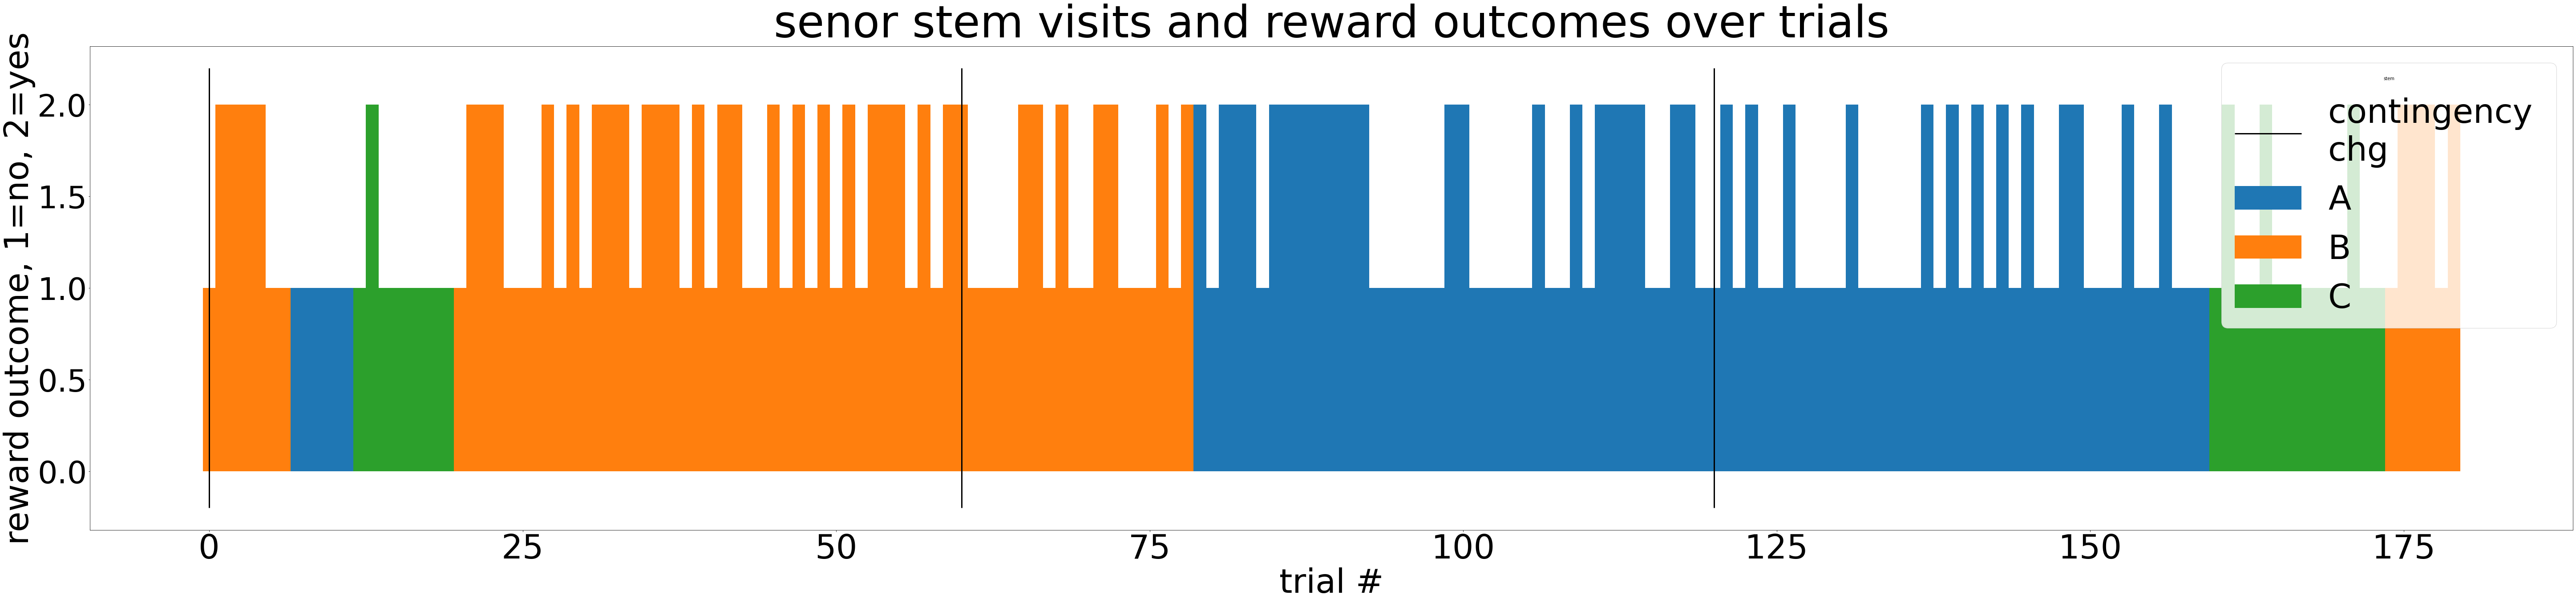

In [184]:
#x=[i for i in range(0,len(binframe1))]
x=[i for i in range(0,180)]


plt.figure(figsize = (100,20))
plt.bar(x,Alist[0:180],width=1)
plt.bar(x,Blist[0:180],width=1)
plt.bar(x,Clist[0:180],width=1)
plt.xlabel('trial #', fontsize = 75)
plt.ylabel('reward outcome, 1=no, 2=yes', fontsize = 75)
plt.vlines(swapConting[0:3],-0.2,2.2,colors='black',label='chg contingency',lw=3)
plt.xticks(fontsize=75)
plt.yticks(fontsize=70)
# plt.vlines(newDays1[0:60],-0.2,2.2,colors='red',linestyle='-',label='new day')
#plt.vlines(chgEpoch1[0:2],-0.2,2.2,colors='pink',linestyle=':',label='chg epoch')
plt.legend(['contingency \nchg','A','B','C'],title='stem',loc='upper right', fontsize = 75)
plt.title('senor stem visits and reward outcomes over trials', fontsize = 100)
plt.show()

In [150]:
chgEpoch1

[0, 180, 360, 540, 720, 900, 993, 1173, 1353]

In [106]:
#now want to plot this daily. and maybe even session by session. 

In [107]:
only_first_cont = df[df['cont_num'] == 1]

In [108]:
only_first_cont
only_first_cont['session_count'] =  

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg,ChooseA,ChooseB,ChooseC
0,0,4,B,1,805020202050,20201028,1,0,1,1,True,True,True,40.0,0,1,0
1,1,1,A,0,805020202050,20201028,1,1,1,1,False,False,True,40.0,1,0,0
2,2,2,A,0,805020202050,20201028,1,2,1,1,False,False,False,40.0,1,0,0
3,3,3,B,1,805020202050,20201028,1,3,1,1,False,False,True,40.0,0,1,0
4,4,4,B,0,805020202050,20201028,1,4,1,1,False,False,False,40.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13168,13168,5,C,1,202020505080,20201107,6,55,11,1,False,False,False,40.0,0,0,1
13169,13169,6,C,1,202020505080,20201107,6,56,11,1,False,False,False,40.0,0,0,1
13170,13170,5,C,0,202020505080,20201107,6,57,11,1,False,False,False,40.0,0,0,1
13171,13171,6,C,0,202020505080,20201107,6,58,11,1,False,False,False,40.0,0,0,1


In [16]:
## Redoooooo


In [78]:
binframe1['ChooseA'] = [int(x) for x in binframe1['ChooseA']]
binframe1['ChooseB'] = [int(x) for x in binframe1['ChooseB']]
binframe1['ChooseC'] = [int(x) for x in binframe1['ChooseC']]




<ipython-input-78-2e842db1d991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe1['ChooseA'] = [int(x) for x in binframe1['ChooseA']]
<ipython-input-78-2e842db1d991>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe1['ChooseB'] = [int(x) for x in binframe1['ChooseB']]
<ipython-input-78-2e842db1d991>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
Alist = []
for i,v in enumerate(binframe1['reward']):
    if binframe1['ChooseA'][i] == 0:
        Alist.append(0)
    elif (binframe1['ChooseA'][i] == 1) & (v==0):
        Alist.append(1)
    elif (binframe1['ChooseA'][i] == 1) & (v==1):
        Alist.append(2)
Blist = []
for i,v in enumerate(binframe1['reward']):
    if binframe1['ChooseB'][i] == 0:
        Blist.append(0)
    elif (binframe1['ChooseB'][i] == 1) & (v==0):
        Blist.append(1)
    elif (binframe1['ChooseB'][i] == 1) & (v==1):
        Blist.append(2)
Clist = []
for i,v in enumerate(binframe1['reward']):
    if binframe1['ChooseC'][i] == 0:
        Clist.append(0)
    elif (binframe1['ChooseC'][i] == 1) & (v==0):
        Clist.append(1)
    elif (binframe1['ChooseC'][i] == 1) & (v==1):
        Clist.append(2)
Alist

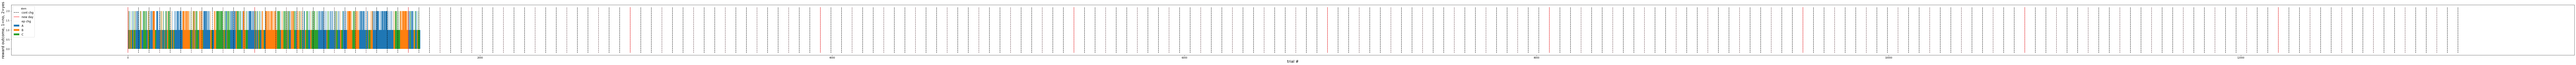

In [80]:
x=[i for i in range(0,len(binframe1))]
plt.figure(figsize = (200,4))
plt.bar(x,Alist,width=1)
plt.bar(x,Blist,width=1)
plt.bar(x,Clist,width=1)
plt.xlabel('trial #', fontsize = 16)
plt.ylabel('reward outcome, 1=no, 2=yes', fontsize = 16)
plt.vlines(swapConting,-0.2,2.2,colors='black',linestyle='--',label='chg contingency')
plt.vlines(newDays,-0.2,2.2,colors='red',linestyle='-',label='new day')
plt.vlines(chgEpoch,-0.2,2.2,colors='pink',linestyle=':',label='chg epoch')
plt.legend(['cont chg','new day','ep chg','A','B','C'],title='stem',loc='upper left', fontsize = 12)
#plt.title(rat + ', stem visits and reward outcomes over trials', fontsize = 16)
plt.show()

In [81]:
one = df[df['day']==9]
two = one[one['session']==2]

In [128]:
two[1:10]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg,ChooseA,ChooseB,ChooseC
9694,9694,3,B,1,205080502050,20201105,2,1,9,1,False,False,False,45.0,0,1,0
9695,9695,4,B,1,205080502050,20201105,2,2,9,1,False,False,False,45.0,0,1,0
9696,9696,3,B,1,205080502050,20201105,2,3,9,1,False,False,False,45.0,0,1,0
9697,9697,4,B,1,205080502050,20201105,2,4,9,1,False,False,False,45.0,0,1,0
9698,9698,3,B,0,205080502050,20201105,2,5,9,1,False,False,False,45.0,0,1,0
9699,9699,4,B,0,205080502050,20201105,2,6,9,1,False,False,False,45.0,0,1,0
9700,9700,2,A,0,205080502050,20201105,2,7,9,1,False,False,True,45.0,1,0,0
9701,9701,1,A,0,205080502050,20201105,2,8,9,1,False,False,False,45.0,1,0,0
9702,9702,2,A,0,205080502050,20201105,2,9,9,1,False,False,False,45.0,1,0,0


In [87]:
example_session = df.iloc[9693:9872]

In [94]:
binframe = example_session[['ChooseA','ChooseB','ChooseC','reward']]
binframe
binframe['ChooseA'] = [int(x) for x in binframe['ChooseA']]
binframe['ChooseB'] = [int(x) for x in binframe['ChooseB']]
binframe['ChooseC'] = [int(x) for x in binframe['ChooseC']]
binframe

<ipython-input-94-179450a86e00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe['ChooseA'] = [int(x) for x in binframe['ChooseA']]
<ipython-input-94-179450a86e00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe['ChooseB'] = [int(x) for x in binframe['ChooseB']]
<ipython-input-94-179450a86e00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,ChooseA,ChooseB,ChooseC,reward
9693,0,1,0,0
9694,0,1,0,1
9695,0,1,0,1
9696,0,1,0,1
9697,0,1,0,1
...,...,...,...,...
9867,0,1,0,0
9868,0,1,0,1
9869,0,1,0,1
9870,0,1,0,1


In [95]:
Alist = []
for i,v in enumerate(binframe['reward']):
    if binframe['ChooseA'][i] == 0:
        Alist.append(0)
    elif (binframe['ChooseA'][i] == 1) & (v==0):
        Alist.append(1)
    elif (binframe['ChooseA'][i] == 1) & (v==1):
        Alist.append(2)
Blist = []
for i,v in enumerate(binframe1['reward']):
    if binframe['ChooseB'][i] == 0:
        Blist.append(0)
    elif (binframe['ChooseB'][i] == 1) & (v==0):
        Blist.append(1)
    elif (binframe['ChooseB'][i] == 1) & (v==1):
        Blist.append(2)
Clist = []
for i,v in enumerate(binframe['reward']):
    if binframe['ChooseC'][i] == 0:
        Clist.append(0)
    elif (binframe['ChooseC'][i] == 1) & (v==0):
        Clist.append(1)
    elif (binframe['ChooseC'][i] == 1) & (v==1):
        Clist.append(2)
Alist

KeyError: 0

ValueError: shape mismatch: objects cannot be broadcast to a single shape

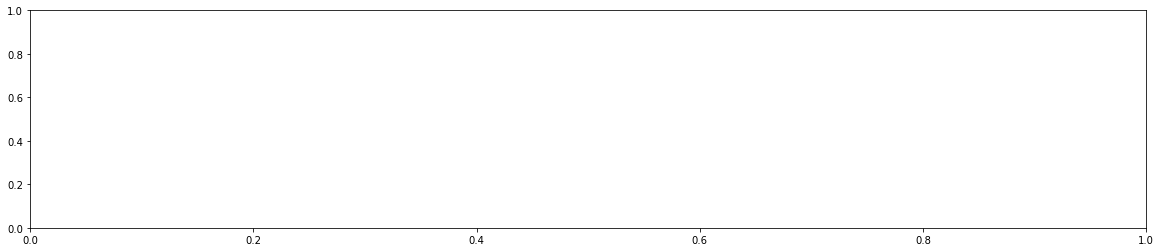

In [96]:
x=[i for i in range(0,179)]
plt.figure(figsize = (20,4))
plt.bar(x,Alist,width=1)
#plt.bar(x,Blist[9693:9872],width=1)
#plt.bar(x,Clist[9693:9872],width=1)
plt.xlabel('trial #', fontsize = 16)
plt.ylabel('reward outcome, 1=no, 2=yes', fontsize = 16)
#plt.vlines(swapConting,-0.2,2.2,colors='black',linestyle='--',label='chg contingency')
#plt.vlines(newDays,-0.2,2.2,colors='red',linestyle='-',label='new day')
#plt.vlines(chgEpoch,-0.2,2.2,colors='pink',linestyle=':',label='chg epoch')
#plt.legend(['cont chg','new day','ep chg','A','B','C'],title='stem',loc='upper left', fontsize = 12)
#plt.title(rat + ', stem visits and reward outcomes over trials', fontsize = 16)
plt.show()

In [86]:
len(Alist)

1661

In [53]:
len(binframe1)

1661

In [60]:
len(Alist[9693:9872])

179

In [64]:
binframe = binframe[9693:9872]

In [68]:
binframe['ChooseA'] = [int(x) for x in binframe['ChooseA']]
binframe['ChooseB'] = [int(x) for x in binframe['ChooseB']]
binframe['ChooseC'] = [int(x) for x in binframe['ChooseC']]

Alist = binframe['ChooseA']+binframe['reward']
Blist = binframe['ChooseB']+binframe['reward']
Clist = binframe['ChooseC']+binframe['reward']

<ipython-input-68-780085bc9037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe['ChooseA'] = [int(x) for x in binframe['ChooseA']]
<ipython-input-68-780085bc9037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe['ChooseB'] = [int(x) for x in binframe['ChooseB']]
<ipython-input-68-780085bc9037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [97]:
binframe

,ChooseA,ChooseB,ChooseC,reward
9693,0,1,0,0
9694,0,1,0,1
9695,0,1,0,1
9696,0,1,0,1
9697,0,1,0,1
...,...,...,...,...
9867,0,1,0,0
9868,0,1,0,1
9869,0,1,0,1
9870,0,1,0,1


0       1
1       1
2       1
3       1
4       0
       ..
1656    0
1657    0
1658    2
1659    1
1660    1
Length: 1661, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

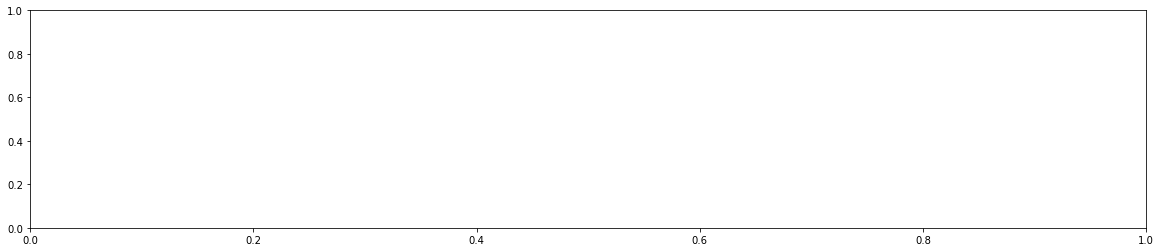

In [98]:
x=[i for i in range(0,179)]
plt.figure(figsize = (20,4))
plt.bar(x,Alist,width=1)
# plt.bar(x,Blist,width=1)
# plt.bar(x,Clist,width=1)
plt.xlabel('trial #', fontsize = 16)
plt.ylabel('reward outcome, 1=no, 2=yes', fontsize = 16)
#plt.vlines(swapConting,-0.2,2.2,colors='black',linestyle='--',label='chg contingency')
#plt.vlines(newDays,-0.2,2.2,colors='red',linestyle='-',label='new day')
#plt.vlines(chgEpoch,-0.2,2.2,colors='pink',linestyle=':',label='chg epoch')
#plt.legend(['cont chg','new day','ep chg','A','B','C'],title='stem',loc='upper left', fontsize = 12)
#plt.title(rat + ', stem visits and reward outcomes over trials', fontsize = 16)
plt.show()

In [72]:
Alist = []
for i,v in enumerate(binframe['reward']):
    if binframe['ChooseA'][i] == 0:
        Alist.append(0)
    elif (binframe['ChooseA'][i] == 1) & (v==0):
        Alist.append(1)
    elif (binframe['ChooseA'][i] == 1) & (v==1):
        Alist.append(2)
Blist = []
for i,v in enumerate(binframe['reward']):
    if binframe['ChooseB'][i] == 0:
        Blist.append(0)
    elif (binframe['ChooseB'][i] == 1) & (v==0):
        Blist.append(1)
    elif (binframe['ChooseB'][i] == 1) & (v==1):
        Blist.append(2)
Clist = []
for i,v in enumerate(binframe['reward']):
    if binframe['ChooseC'][i] == 0:
        Clist.append(0)
    elif (binframe['ChooseC'][i] == 1) & (v==0):
        Clist.append(1)
    elif (binframe['ChooseC'][i] == 1) & (v==1):
        Clist.append(2)
Alist

KeyError: 0